In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data_cleaned.csv')

In [5]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [6]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [24]:
from sklearn.model_selection import train_test_split as tt
train_x,val_x,train_y,val_y=tt(x,y,random_state=10,stratify=y)
val_x.shape


(223, 24)

In [10]:
from sklearn.tree import DecisionTreeClassifier 
dd=DecisionTreeClassifier(random_state=10)

In [12]:
dd.fit(train_x,train_y)
dd.score(train_x,train_y)

0.9820359281437125

In [36]:
dd.score(val_x,val_y)

0.7757847533632287

In [16]:
dd.predict(val_x)

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [18]:
dd.predict_proba(val_x)

array([[0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1. 

In [47]:
val_xx=dd.predict_proba(val_x)[:,1]
p=[]
for i in range(len(val_x)):
    if val_xx[i]>0.3:
        p.append(1)
    else:
        p.append(0)


In [49]:
from sklearn.metrics import accuracy_score as aa
aa(p,val_y)

0.7892376681614349

In [51]:
ff=[]
gg=[]
for i in range(1,10):
    dd=DecisionTreeClassifier(max_depth=i,random_state=10)
    dd.fit(train_x,train_y)
    ff.append(dd.score(train_x,train_y))
    gg.append(dd.score(val_x,val_y))


In [53]:
a=pd.DataFrame({'Max_Depth':range(1,10),'Train_score':ff,'Validation_score':gg})
a

,Max_Depth,Train_score,Validation_score
0,1,0.781437,0.802691
1,2,0.794910,0.762332
2,3,0.820359,0.843049
3,4,0.826347,0.807175
4,5,0.851796,0.847534
5,6,0.872754,0.852018
6,7,0.892216,0.847534
7,8,0.911677,0.834081
8,9,0.926647,0.816143


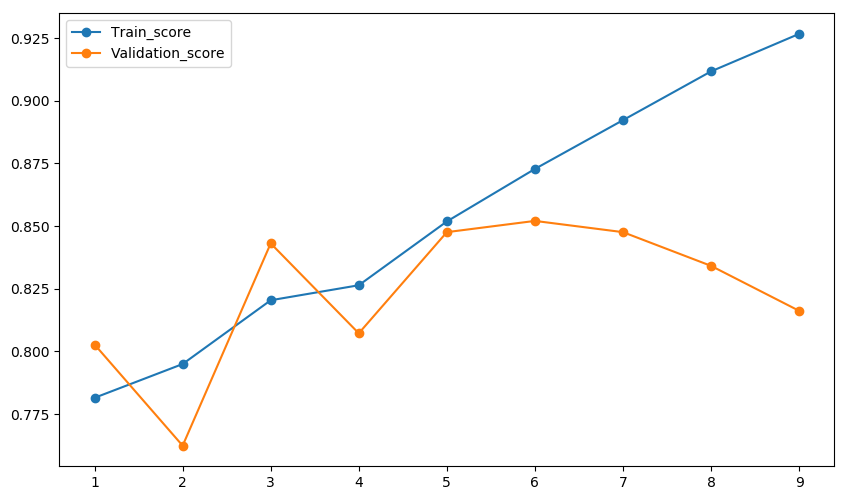

In [59]:
plt.figure(figsize=(10,6),dpi=100,edgecolor='y')
plt.plot(a['Max_Depth'],a['Train_score'],marker='o')
plt.plot(a['Max_Depth'],a['Validation_score'],marker='o')
plt.legend()

In [63]:
dd=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=25,random_state=10)
dd.fit(train_x,train_y)
dd.score(train_x,train_y)


0.8697604790419161

In [65]:
dd.score(val_x,val_y)

0.8654708520179372

In [77]:
df=pd.read_csv('train_bm.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


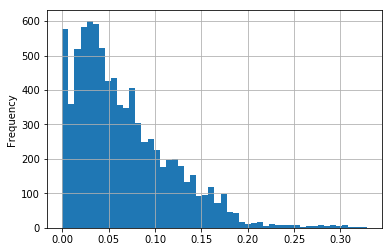

In [80]:
df['Item_Visibility'].plot(kind='hist',bins=50)
plt.grid()